BREAST CANCER

In [13]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [14]:
# Read CSV  data file into DataFrame
cancer_df = pd.read_csv("data.csv")

# preview the data
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


DATA WRANGLING

In [16]:
# cancer_df=cancer_df.drop(['id'],axis=1)
# cancer_df=cancer_df.drop(cancer_df.iloc[:,11:32],axis=1)
col = cancer_df.columns
y = cancer_df['diagnosis']
list = ['Unnamed: 32','id','diagnosis']
cancer_df = cancer_df.drop(list,axis=1)

In [17]:
cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
#check if there is a NaN value in our data frame x, 
# a False indicates there are no missing values
cancer_df.isnull().values.any()

False

In [19]:
cancer_df.to_csv('Modified data.csv', index=False)

Number of Benign:  357
Number of Malignant :  212


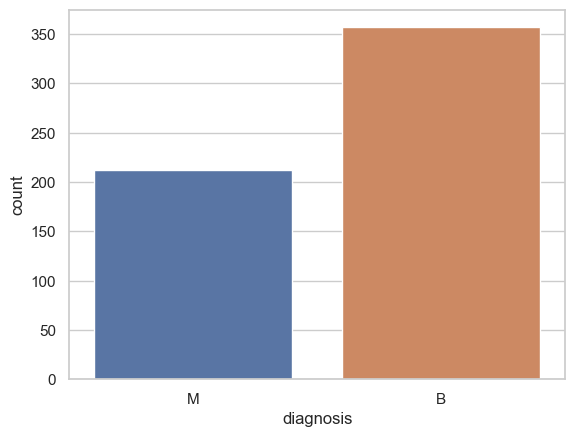

In [20]:
sns.set(style="whitegrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
B, M = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [21]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactness_worst',
             'concave points_worst','compactness_se','concave points_se',
             'texture_worst','area_worst']
x_1 = cancer_df.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


CORRELATION

<AxesSubplot: >

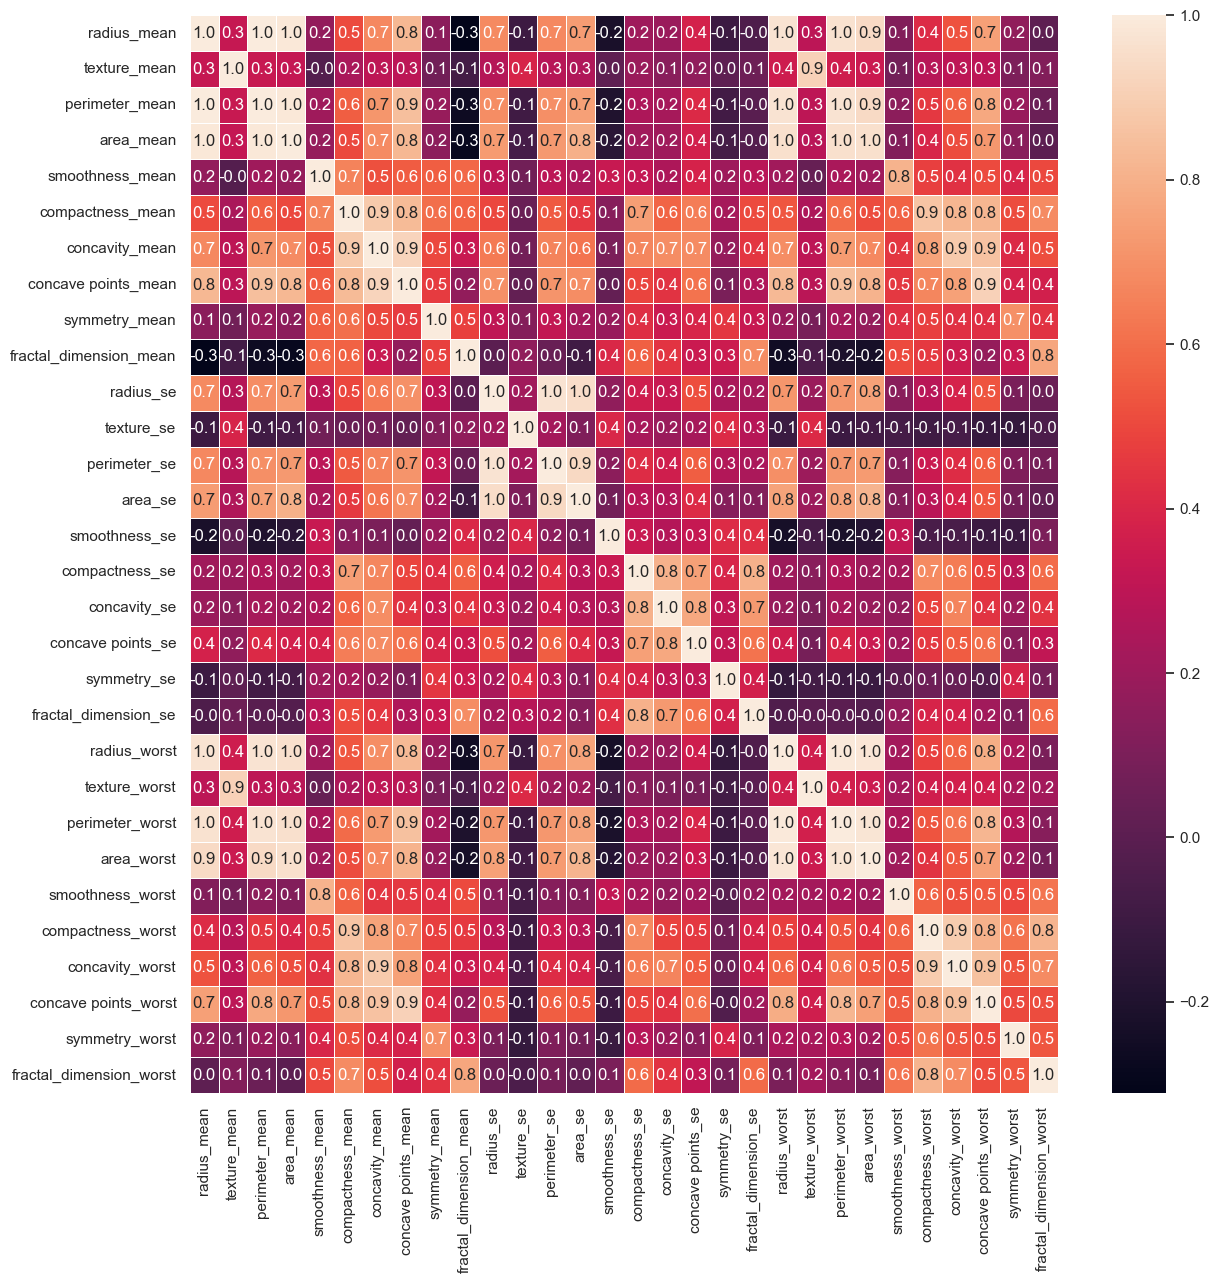

In [22]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(cancer_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

,texture_mean,area_mean,concavity_mean,symmetry_mean,texture_se,area_se,concavity_se,symmetry_se,fractal_dimension_se,concavity_worst,symmetry_worst
texture_mean,1.000000,0.321086,0.302418,0.071401,0.386358,0.259845,0.143293,0.009127,0.054458,0.301025,0.105008
area_mean,0.321086,1.000000,0.685983,0.151293,-0.066280,0.800086,0.207660,-0.072497,-0.019887,0.512606,0.143570
concavity_mean,0.302418,0.685983,1.000000,0.500667,0.076218,0.617427,0.691270,0.178009,0.449301,0.884103,0.409464
symmetry_mean,0.071401,0.151293,0.500667,1.000000,0.128053,0.223970,0.342627,0.449137,0.331786,0.433721,0.699826
texture_se,0.386358,-0.066280,0.076218,0.128053,1.000000,0.111567,0.194998,0.411621,0.279723,-0.068956,-0.128215
area_se,0.259845,0.800086,0.617427,0.223970,0.111567,1.000000,0.270895,0.134109,0.127071,0.385100,0.074126
concavity_se,0.143293,0.207660,0.691270,0.342627,0.194998,0.270895,1.000000,0.309429,0.727372,0.662564,0.197788
symmetry_se,0.009127,-0.072497,0.178009,0.449137,0.411621,0.134109,0.309429,1.000000,0.369078,0.037119,0.389402
fractal_dimension_se,0.054458,-0.019887,0.449301,0.331786,0.279723,0.127071,0.727372,0.369078,1.000000,0.379975,0.111094
concavity_worst,0.301025,0.512606,0.884103,0.433721,-0.068956,0.385100,0.662564,0.037119,0.379975,1.000000,0.532520


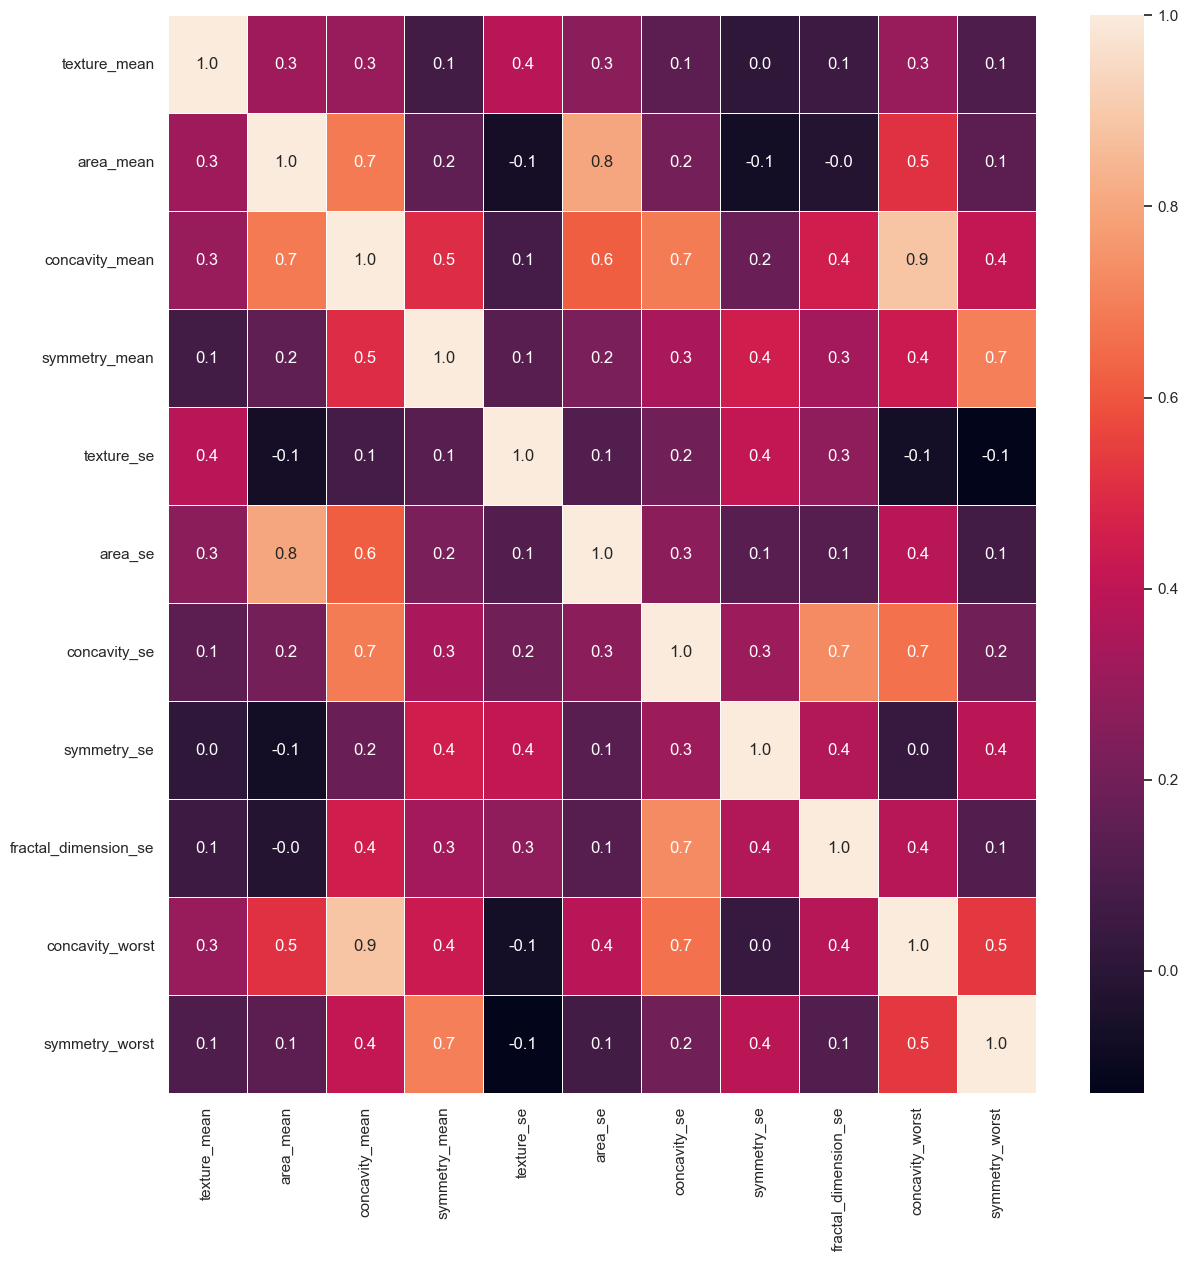

In [23]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
             'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
             'compactness_se','concave points_se','texture_worst','area_worst', 'fractal_dimension_mean', 
             'fractal_dimension_worst', 'smoothness_mean','smoothness_se','smoothness_worst']
x_1 = cancer_df.drop(drop_list,axis = 1 )         


#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
x_1.corr()

BINNING and MODEL DEVELOPMENT

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.feature_selection import RFE

In [25]:
#It appears that the function recall_score needs to have y in a binary format, unlike accuracy_score can
#take into account the alphabetical format too.
#We write y in the binary format, with B=0 and M=1
y = y.replace("B", 0)
y = y.replace("M", 1)

Recall   is:  0.9365079365079365
Accuracy is:  0.9649122807017544
F1 score is:  0.9516129032258064


<AxesSubplot: >

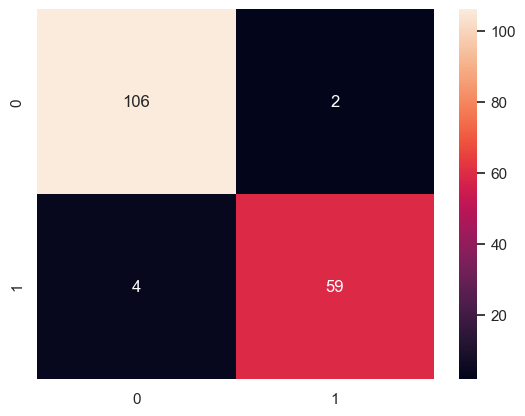

In [26]:
# split data 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(cancer_df, y, test_size=0.3, random_state=42)

# Create the RFE object and rank each pixel
clf_rf_2 = RandomForestClassifier(random_state=43)      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=16, step=1)
rfe = rfe.fit(x_train, y_train)

recall = recall_score(y_test,rfe.predict(x_test))
print('Recall   is: ', recall)
accuracy = accuracy_score(y_test,rfe.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfe.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfe.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

MODEL EVALUATION

In [27]:
#Accuracy score
from sklearn.metrics import accuracy_score
rfe_test_pred = rfe.predict(x_test)
print ("Train Accuracy is {:.2F}".format(rfe.score(x_train,y_train)*100),"%")
print ("Accuracy Test score is {:.2f}".format(accuracy_score(y_test, rfe_test_pred)*100),"%")

Train Accuracy is 100.00 %
Accuracy Test score is 96.49 %


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Create the confusion matrix
confusion_matrix = confusion_matrix(y_test, rfe_test_pred)
print(confusion_matrix)

[[106   2]
 [  4  59]]


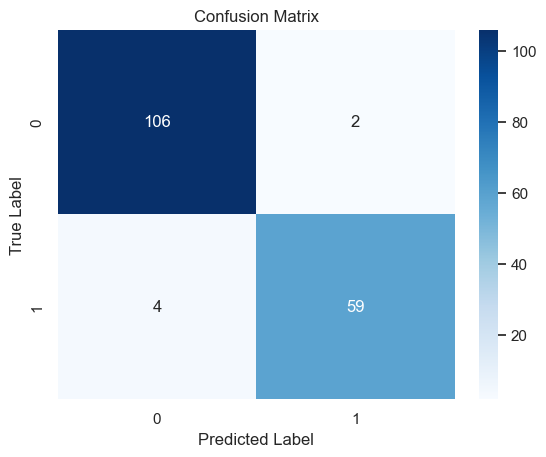

In [47]:
# Plot the confusion matrix using seaborn
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

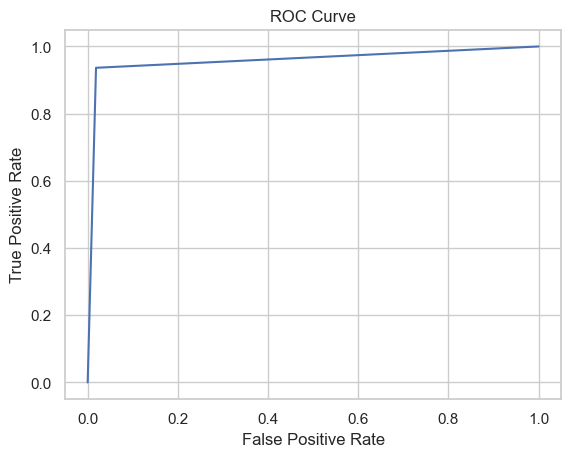

AUC score is 1.00


In [56]:
from sklearn.metrics import roc_auc_score, roc_curve
# Get the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, rfe_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#AUC
from sklearn import metrics
auc_score=metrics.roc_auc_score (np.array(y_test), rfe.predict_proba (x_test)[:,1]) 
print("AUC score is {:.2f}".format(auc_score))